In [85]:
import os
import glob
import subprocess
import sys
import time
#import pims
from IPython.display import display, Image
import matplotlib.pyplot as plt
from os.path import expanduser


home = expanduser("~")
output_dir = os.path.join(home,'scratch/isofit_output')
os.makedirs(os.path.dirname(output_dir), exist_ok=True)
print(output_dir)

/Users/shawnserbin/scratch/isofit_output


In [86]:
# Grab isofit_prosaild Docker container
os.system("docker pull serbinsh/isofit_containers:isofit_prosaild_master_latest")

0

In [87]:
# check for isofit_prosaild Docker container
#os.system("docker image ls").read()
output = subprocess.check_output("docker image ls", shell=True)
print(output, sep="\t", end="\n")

b'REPOSITORY                    TAG                             IMAGE ID            CREATED             SIZE\nserbinsh/isofit_containers    isofit_prosaild_master_latest   816b37e5791c        2 days ago          2.89GB\nserbinsh/isofit_containers    isofit_master_latest            12a7e280cd42        2 days ago          2.89GB\nserbinsh/prosail_containers   prosail_D_basic                 1fe711b156bf        2 days ago          1.41GB\ngcc                           7.4.0                           3a64de0e2eee        13 days ago         1.14GB\nserbinsh/my-first-repo        latest                          738510d23969        4 weeks ago         1.2MB\nbusybox                       latest                          d8233ab899d4        4 weeks ago         1.2MB\npython                        2.7-slim                        99079b24ed51        4 weeks ago         120MB\njmhobbs/terminal-parrot       latest                          6a001d00ef7f        9 months ago        2.79MB\n'


In [89]:
# Setup isofit run options and inputs
docker_name = "serbinsh/isofit_containers:isofit_prosaild_master_latest"
host_output_dir = output_dir
docker_output_dir = "/isofit/examples/20171108_Pasadena/"
print(''.join([host_output_dir,":",docker_output_dir]))
#
examples = "/isofit/examples/20171108_Pasadena"
run_command = ''.join(["/bin/sh -c ","'cd ",examples," && mkdir -p lut ","&& ./run_example_libradtran.sh'"])
print(run_command)

/Users/shawnserbin/scratch/isofit_output:/isofit/examples/20171108_Pasadena/
/bin/sh -c 'cd /isofit/examples/20171108_Pasadena && mkdir -p lut && ./run_example_libradtran.sh'


In [90]:
# Run
start = time.time()
# run the docker container
os.system(''.join(["docker run --user isofit -v ",host_output_dir,":",docker_output_dir,"output -v ", host_output_dir,"/images:",docker_output_dir,"images -v ",host_output_dir,"/lut:",docker_output_dir,"lut"," ",docker_name," ",run_command]))
# print the run string
print(''.join(["docker run --user isofit -v ",host_output_dir,":",docker_output_dir,"output -v ", host_output_dir,"/images:",docker_output_dir,"images -v ",host_output_dir,"/lut:",docker_output_dir,"lut"," ",docker_name]))
# get runtime
end = time.time()
#Print runtime
print(end - start)

docker run --user isofit -v /Users/shawnserbin/scratch/isofit_output:/isofit/examples/20171108_Pasadena/output -v /Users/shawnserbin/scratch/isofit_output/images:/isofit/examples/20171108_Pasadena/images -v /Users/shawnserbin/scratch/isofit_output/lut:/isofit/examples/20171108_Pasadena/lut serbinsh/isofit_containers:isofit_prosaild_master_latest
403.3957197666168


In [91]:
# show output frames
#images_dir = os.path.join(output_dir,'images')
#print(images_dir)
#frames = pims.ImageSequence(''.join([images_dir,"/*.png"]))
#print(frames)

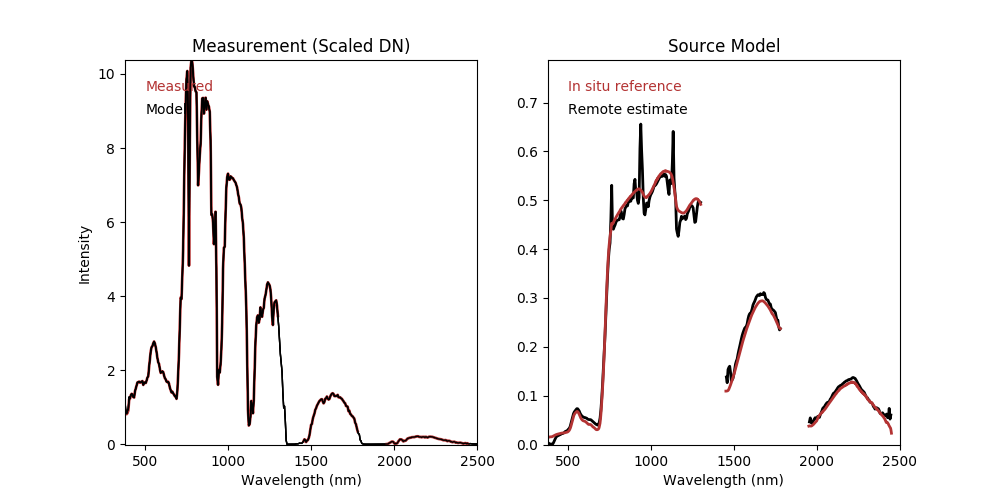

In [92]:
# frame_0
file0 = ''.join([images_dir,"/frame_0.png"])
Image(filename=file0)

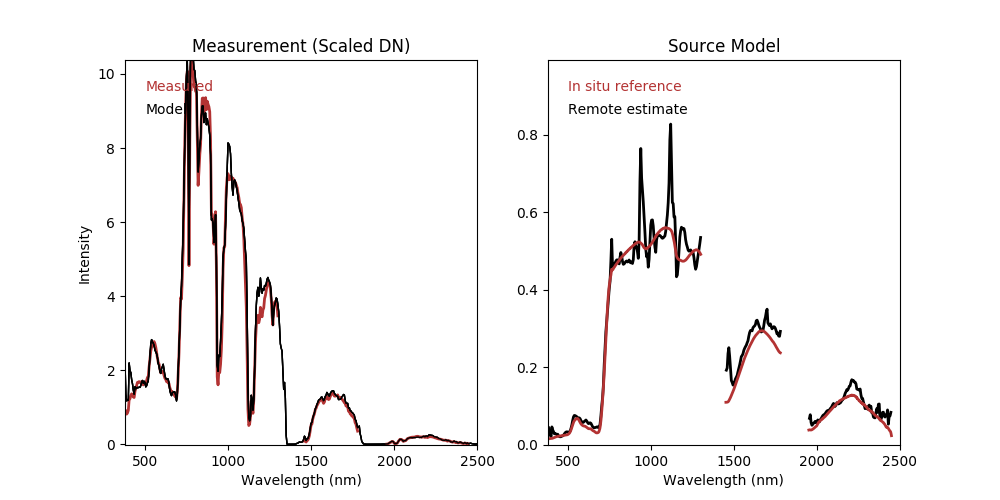

In [93]:
# frame_1
file1 = ''.join([images_dir,"/frame_1.png"])
Image(filename=file1)

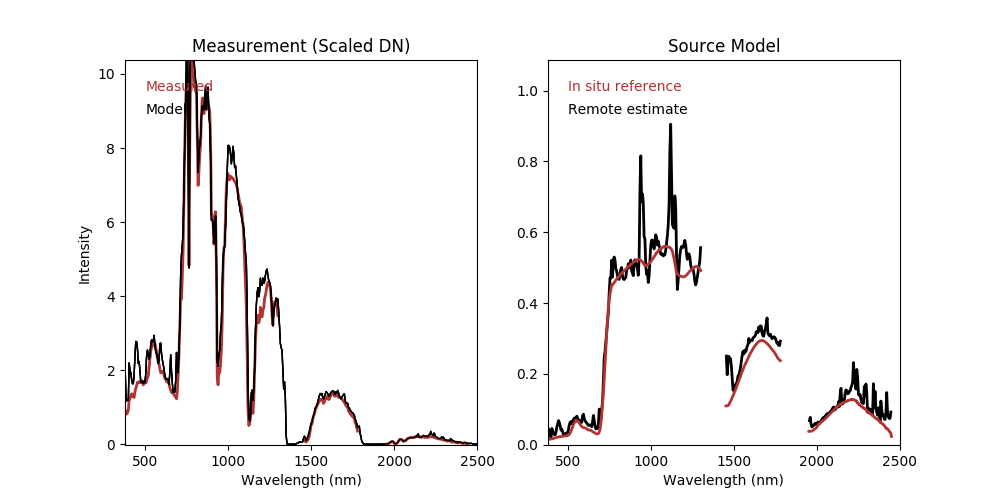

In [94]:
# frame_2
file2 = ''.join([images_dir,"/frame_2.png"])
Image(filename=file2)

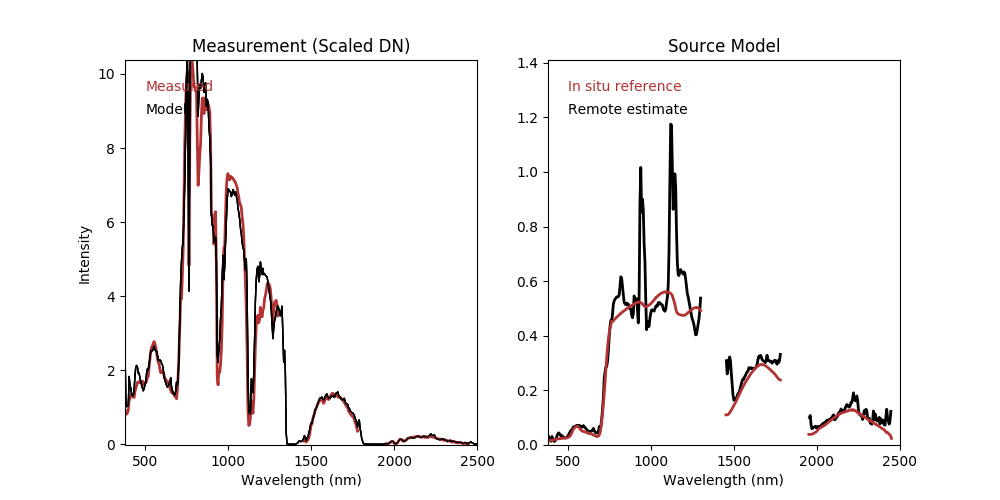

In [95]:
# frame_3
file3 = ''.join([images_dir,"/frame_3.png"])
Image(filename=file3)

/Users/shawnserbin/scratch/isofit_output/ang20171108t184227_rfl_v2p11_BeckmanLawn-libRadTran.txt


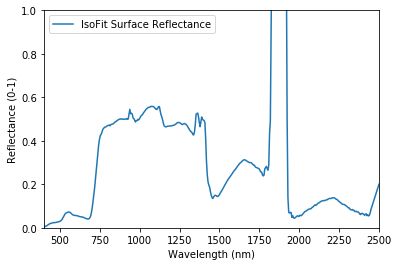

In [99]:
# Plot main reflectance output
for files in glob.glob(os.path.join(output_dir,"*_rfl_*")):
    f = open( files, 'r' )
    file_contents = f.read()
    print(f.name)
    filename_in = f.name
    f.close()
    
f2 = open(filename_in, 'r') 
lines = f2.readlines()
x = []
y = [] 
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
f2.close() 

plt.plot(x,y, label='IsoFit Surface Reflectance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (0-1)')
plt.axis([400, 2500, 0, 1])
plt.legend()
plt.show()

/Users/shawnserbin/scratch/isofit_output/ang20171108t184227_mdl_v2p11_BeckmanLawn-libRadTran.txt


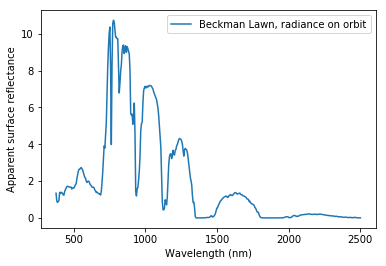

In [98]:
for files in glob.glob(os.path.join(output_dir,"*_mdl_*")):
    f = open( files, 'r' )
    file_contents = f.read()
    print(f.name)
    filename_in = f.name
    f.close()
    
f2 = open(filename_in, 'r') 
lines = f2.readlines()
x = []
y = [] 
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
f2.close() 

plt.plot(x,y, label='Beckman Lawn, radiance on orbit')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent surface reflectance')
plt.legend()
plt.show()